# RL-based Autonomous Coordination in Mobile Networks

[mobile-env](https://github.com/stefanbschneider/mobile-env/tree/main) environment allows modeling users moving around an area and can connect to one or multiple base stations. This environment supports multi-agent and centralized reinforcement learning policies.

In the following example: given a number of base stations or cells (BSs) and user equipments (UEs). The objective is to decide what connections should be established among UEs and BSs in order to maximize Quality of Experience (QoE) globally. 

![Mobile Networks](mobile.gif)

To maximize the QoE of single UEs, the UE intends to connect to as many BSs as possible, which yields higher (macro) data rates. However, BSs multiplex resources among connected UEs (e.g. schedule physical resource blocks) and, therefore, UEs compete for limited resources (conflicting goals). To achieve maximum QoE globally, the policy must consider two crucial factors:
* The data rate (DR in GB/s) of each connection is determined by the channel's quality (e.g., Signal-to-Noise Ratio) between the UE and BS.
* The QoE of individual UEs does not necessarily increase linearly with higher data rates.

For more information, see: [mobile-env: An Open Environment for Autonomous Coordination in Mobile Networks](https://github.com/stefanbschneider/mobile-env/tree/main)

<b>Requirements</b>
<br>gymnasium==0.28.1
<br>mobile-env
<br>stable_baselines3==2.0.0
<br>ray==2.6.1

In [1]:
# !pip install mobile-env

In [2]:
import gymnasium
import matplotlib.pyplot as plt
import mobile_env
from IPython import display

### Create environment

create a small/medium/large mobile environment for a single, centralized control agent. Pass rgb_array as render mode so the env can be rendered inside the notebook

|Environment| # of base station (BSs) | # of user equirpment (UEs)| 
|-----|-------|------| 
|mobile-small-central-v0| 3 | 5 |
|mobile-medium-central-v0| 3 | 15 |
|mobile-large-central-v0| 3 | 50 |

In [3]:
env = gymnasium.make("mobile-small-central-v0", render_mode="rgb_array")
print(f"\nSmall environment with {env.NUM_USERS} users and {env.NUM_STATIONS} cells.")


Small environment with 5 users and 3 cells.


### Run the simulation for 10 time steps with random dummy actions

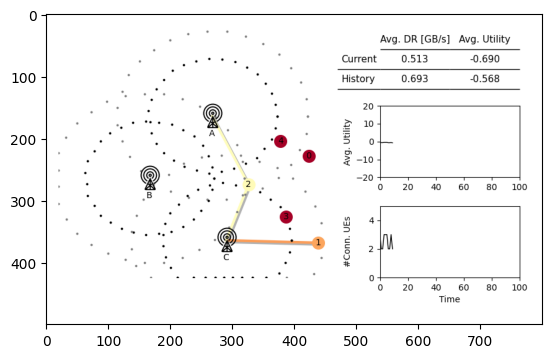

In [4]:
done = False
obs, info = env.reset()
for _ in range(10):
    # Use random dummy actions by sampling from the action space
    dummy_action = env.action_space.sample()
    obs, reward, terminated, truncated, info = env.step(dummy_action)

    # Render the environment
    plt.imshow(env.render())
    display.display(plt.gcf())
    display.clear_output(wait=True)

### Centralized RL policy learning

The objective is to train a single centralized PPO agent to learn the optimal policy for mobile network coordination

### Train PPO model

In [5]:
from stable_baselines3 import PPO
from stable_baselines3.ppo import MlpPolicy

# Train PPO agent on environment
model = PPO(MlpPolicy, env, tensorboard_log='results_sb', verbose=1)
model.learn(total_timesteps=30000, progress_bar=True)

Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
Logging to results_sb\PPO_7


Output()

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 100      |
|    ep_rew_mean     | -41.2    |
| time/              |          |
|    fps             | 59       |
|    iterations      | 1        |
|    time_elapsed    | 34       |
|    total_timesteps | 2048     |
---------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 100         |
|    ep_rew_mean          | -39.5       |
| time/                   |             |
|    fps                  | 60          |
|    iterations           | 2           |
|    time_elapsed         | 68          |
|    total_timesteps      | 4096        |
| train/                  |             |
|    approx_kl            | 0.016016345 |
|    clip_fraction        | 0.152       |
|    clip_range           | 0.2         |
|    entropy_loss         | -6.92       |
|    explained_variance   | -0.0554     |
|    learning_rate        | 0.0003      |
|    loss                 | 1.93        |
|    n_updates            | 10          |
|    policy_gradient_loss | -0.0344     |
|    value_loss           | 8.81        |
-----------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 100         |
|    ep_rew_mean          | -38.9       |
| time/                   |             |
|    fps                  | 59          |
|    iterations           | 3           |
|    time_elapsed         | 102         |
|    total_timesteps      | 6144        |
| train/                  |             |
|    approx_kl            | 0.013432874 |
|    clip_fraction        | 0.107       |
|    clip_range           | 0.2         |
|    entropy_loss         | -6.91       |
|    explained_variance   | 0.243       |
|    learning_rate        | 0.0003      |
|    loss                 | 1.43        |
|    n_updates            | 20          |
|    policy_gradient_loss | -0.0279     |
|    value_loss           | 6.42        |
-----------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 100         |
|    ep_rew_mean          | -38.2       |
| time/                   |             |
|    fps                  | 59          |
|    iterations           | 4           |
|    time_elapsed         | 137         |
|    total_timesteps      | 8192        |
| train/                  |             |
|    approx_kl            | 0.013590279 |
|    clip_fraction        | 0.116       |
|    clip_range           | 0.2         |
|    entropy_loss         | -6.89       |
|    explained_variance   | 0.143       |
|    learning_rate        | 0.0003      |
|    loss                 | 1.64        |
|    n_updates            | 30          |
|    policy_gradient_loss | -0.0281     |
|    value_loss           | 5.74        |
-----------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 100         |
|    ep_rew_mean          | -37.8       |
| time/                   |             |
|    fps                  | 59          |
|    iterations           | 5           |
|    time_elapsed         | 171         |
|    total_timesteps      | 10240       |
| train/                  |             |
|    approx_kl            | 0.014797471 |
|    clip_fraction        | 0.129       |
|    clip_range           | 0.2         |
|    entropy_loss         | -6.87       |
|    explained_variance   | 0.156       |
|    learning_rate        | 0.0003      |
|    loss                 | 1.64        |
|    n_updates            | 40          |
|    policy_gradient_loss | -0.0329     |
|    value_loss           | 4.51        |
-----------------------------------------


----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 100        |
|    ep_rew_mean          | -37        |
| time/                   |            |
|    fps                  | 59         |
|    iterations           | 6          |
|    time_elapsed         | 207        |
|    total_timesteps      | 12288      |
| train/                  |            |
|    approx_kl            | 0.01371371 |
|    clip_fraction        | 0.124      |
|    clip_range           | 0.2        |
|    entropy_loss         | -6.85      |
|    explained_variance   | 0.426      |
|    learning_rate        | 0.0003     |
|    loss                 | 1.82       |
|    n_updates            | 50         |
|    policy_gradient_loss | -0.0303    |
|    value_loss           | 3.7        |
----------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 100         |
|    ep_rew_mean          | -36.3       |
| time/                   |             |
|    fps                  | 58          |
|    iterations           | 7           |
|    time_elapsed         | 246         |
|    total_timesteps      | 14336       |
| train/                  |             |
|    approx_kl            | 0.015693188 |
|    clip_fraction        | 0.149       |
|    clip_range           | 0.2         |
|    entropy_loss         | -6.83       |
|    explained_variance   | 0.407       |
|    learning_rate        | 0.0003      |
|    loss                 | 0.998       |
|    n_updates            | 60          |
|    policy_gradient_loss | -0.0341     |
|    value_loss           | 2.88        |
-----------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 100         |
|    ep_rew_mean          | -35.4       |
| time/                   |             |
|    fps                  | 57          |
|    iterations           | 8           |
|    time_elapsed         | 283         |
|    total_timesteps      | 16384       |
| train/                  |             |
|    approx_kl            | 0.016036652 |
|    clip_fraction        | 0.166       |
|    clip_range           | 0.2         |
|    entropy_loss         | -6.8        |
|    explained_variance   | 0.393       |
|    learning_rate        | 0.0003      |
|    loss                 | 1.34        |
|    n_updates            | 70          |
|    policy_gradient_loss | -0.0382     |
|    value_loss           | 3.34        |
-----------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 100         |
|    ep_rew_mean          | -34.7       |
| time/                   |             |
|    fps                  | 57          |
|    iterations           | 9           |
|    time_elapsed         | 319         |
|    total_timesteps      | 18432       |
| train/                  |             |
|    approx_kl            | 0.014829356 |
|    clip_fraction        | 0.144       |
|    clip_range           | 0.2         |
|    entropy_loss         | -6.77       |
|    explained_variance   | 0.346       |
|    learning_rate        | 0.0003      |
|    loss                 | 0.8         |
|    n_updates            | 80          |
|    policy_gradient_loss | -0.0354     |
|    value_loss           | 3.44        |
-----------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 100         |
|    ep_rew_mean          | -33.5       |
| time/                   |             |
|    fps                  | 57          |
|    iterations           | 10          |
|    time_elapsed         | 355         |
|    total_timesteps      | 20480       |
| train/                  |             |
|    approx_kl            | 0.016216021 |
|    clip_fraction        | 0.148       |
|    clip_range           | 0.2         |
|    entropy_loss         | -6.74       |
|    explained_variance   | 0.251       |
|    learning_rate        | 0.0003      |
|    loss                 | 1.49        |
|    n_updates            | 90          |
|    policy_gradient_loss | -0.0385     |
|    value_loss           | 3.39        |
-----------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 100         |
|    ep_rew_mean          | -31.8       |
| time/                   |             |
|    fps                  | 57          |
|    iterations           | 11          |
|    time_elapsed         | 391         |
|    total_timesteps      | 22528       |
| train/                  |             |
|    approx_kl            | 0.015299198 |
|    clip_fraction        | 0.151       |
|    clip_range           | 0.2         |
|    entropy_loss         | -6.71       |
|    explained_variance   | 0.4         |
|    learning_rate        | 0.0003      |
|    loss                 | 1.37        |
|    n_updates            | 100         |
|    policy_gradient_loss | -0.0352     |
|    value_loss           | 3.87        |
-----------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 100         |
|    ep_rew_mean          | -31.1       |
| time/                   |             |
|    fps                  | 57          |
|    iterations           | 12          |
|    time_elapsed         | 427         |
|    total_timesteps      | 24576       |
| train/                  |             |
|    approx_kl            | 0.014328964 |
|    clip_fraction        | 0.145       |
|    clip_range           | 0.2         |
|    entropy_loss         | -6.68       |
|    explained_variance   | 0.427       |
|    learning_rate        | 0.0003      |
|    loss                 | 1.28        |
|    n_updates            | 110         |
|    policy_gradient_loss | -0.0361     |
|    value_loss           | 3.04        |
-----------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 100         |
|    ep_rew_mean          | -30.7       |
| time/                   |             |
|    fps                  | 57          |
|    iterations           | 13          |
|    time_elapsed         | 463         |
|    total_timesteps      | 26624       |
| train/                  |             |
|    approx_kl            | 0.016830515 |
|    clip_fraction        | 0.16        |
|    clip_range           | 0.2         |
|    entropy_loss         | -6.67       |
|    explained_variance   | 0.405       |
|    learning_rate        | 0.0003      |
|    loss                 | 0.982       |
|    n_updates            | 120         |
|    policy_gradient_loss | -0.0373     |
|    value_loss           | 3.04        |
-----------------------------------------


------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 100          |
|    ep_rew_mean          | -29.9        |
| time/                   |              |
|    fps                  | 57           |
|    iterations           | 14           |
|    time_elapsed         | 500          |
|    total_timesteps      | 28672        |
| train/                  |              |
|    approx_kl            | 0.0143827805 |
|    clip_fraction        | 0.136        |
|    clip_range           | 0.2          |
|    entropy_loss         | -6.63        |
|    explained_variance   | 0.416        |
|    learning_rate        | 0.0003       |
|    loss                 | 1.27         |
|    n_updates            | 130          |
|    policy_gradient_loss | -0.032       |
|    value_loss           | 3.65         |
------------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 100         |
|    ep_rew_mean          | -29.8       |
| time/                   |             |
|    fps                  | 57          |
|    iterations           | 15          |
|    time_elapsed         | 536         |
|    total_timesteps      | 30720       |
| train/                  |             |
|    approx_kl            | 0.014853958 |
|    clip_fraction        | 0.145       |
|    clip_range           | 0.2         |
|    entropy_loss         | -6.61       |
|    explained_variance   | 0.439       |
|    learning_rate        | 0.0003      |
|    loss                 | 1.22        |
|    n_updates            | 140         |
|    policy_gradient_loss | -0.0338     |
|    value_loss           | 3.19        |
-----------------------------------------


### Render the environment state after training

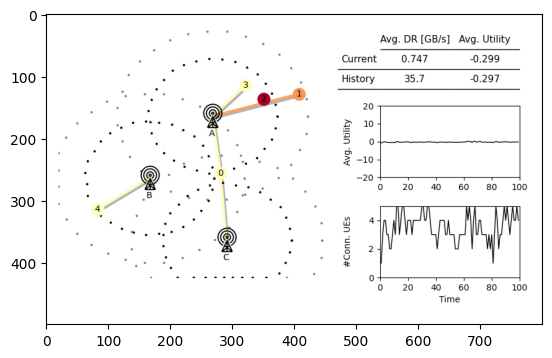

In [6]:
obs, info = env.reset()
done = False

# Run one episode with the trained model
while not done:
    action, _ = model.predict(obs)

    # Perform step on simulation environment
    obs, reward, terminated, truncated, info = env.step(action)
    done = terminated or truncated

    # Render environment as RGB
    plt.imshow(env.render())
    display.display(plt.gcf())
    display.clear_output(wait=True)

### Observed features

Handlers define the observation and action spaces as well as the reward for an environment. Hence, when designing a new Markov Decision Process for a reinforcement learning approach, you can quickly validate it by implementing a new handler in mobile-env.

By default, observed features are:
* The current connections between users and cells (binary)
* The signal-to-noise-ratio (SNR) between all users and cells (normalized to [0,1])
* The current utility (i.e., QoE) of each user (normalized to [-1,1])

In [7]:
env.handler.features

['connections', 'snrs', 'utility']

### Print observations

In [8]:
obs, info = env.reset(seed=42)
obs, reward, terminated, truncated, info = env.step(env.action_space.sample())

print("Raw observations: ", obs)

# Connections and SNR are per user and station, utility just per user
obs_per_user = 2 * env.NUM_STATIONS + 1
for ue in range(env.NUM_USERS):
    print(f"\nObservations for user {ue + 1}:")
    offset = ue * obs_per_user
    print(f"Current connections to the {env.NUM_STATIONS} cells: {obs[offset:offset+env.NUM_STATIONS]}")
    print(f"SNR to the {env.NUM_STATIONS} cells: {obs[offset+env.NUM_STATIONS:offset+2*env.NUM_STATIONS]}")
    print(f"Current utility: {obs[offset+2*env.NUM_STATIONS]}")

Raw observations:  [ 0.          0.          0.          0.695659    0.27095294  1.
 -1.          0.          0.          0.          1.          0.37211105
  0.07161748 -1.          0.          0.          0.          0.09645249
  0.091206    1.         -1.          0.          0.          0.
  1.          0.5671929   0.08269141 -1.          0.          0.
  0.          1.          0.23271252  0.44786757 -1.        ]

Observations for user 1:
Current connections to the 3 cells: [0. 0. 0.]
SNR to the 3 cells: [0.695659   0.27095294 1.        ]
Current utility: -1.0

Observations for user 2:
Current connections to the 3 cells: [0. 0. 0.]
SNR to the 3 cells: [1.         0.37211105 0.07161748]
Current utility: -1.0

Observations for user 3:
Current connections to the 3 cells: [0. 0. 0.]
SNR to the 3 cells: [0.09645249 0.091206   1.        ]
Current utility: -1.0

Observations for user 4:
Current connections to the 3 cells: [0. 0. 0.]
SNR to the 3 cells: [1.         0.5671929  0.08269141]


# Train a PPO-based multi-agent policy with Ray RLlib

Instead of having a single RL agent centrally control cell selection for all users, an alternative approach is to adopt multi-agent RL. In this setup, multiple RL agents work in parallel, with each agent being responsible for the cell selection of a specific user. For instance, in mobile-small-ma-v0 scenario, we will use 5 RL agents, each catering to the cell selection needs of a single user. This approach allows for more distributed and decentralized control, enhancing the scalability and efficiency of the system.

In [9]:
# !pip install -U "ray[rllib]"

In [10]:
import gymnasium
import matplotlib.pyplot as plt
from IPython import display
import logging
logging.getLogger("ray").setLevel(logging.ERROR)

import ray
from ray.tune.registry import register_env
import ray.air
from ray.rllib.algorithms.ppo import PPOConfig
from ray.rllib.policy.policy import PolicySpec
from ray.tune.stopper import MaximumIterationStopper
from ray.rllib.algorithms.algorithm import Algorithm
from mobile_env.wrappers.multi_agent import RLlibMAWrapper

2023-08-20 10:49:46,267	WARNING deprecation.py:51 -- DeprecationWarning: `DirectStepOptimizer` has been deprecated. This will raise an error in the future!


### Create and register an environment

In [11]:
# Use the mobile-env RLlib wrapper for RLlib
def register(config):  
    env = gymnasium.make("mobile-small-ma-v0")
    return RLlibMAWrapper(env)

# Register the predefined scenario with RLlib
register_env("mobile-small-ma-v0", register)

### Initialize Ray

In [12]:
# Initialize ray with available CPUs (and GPUs) and init ray
ray.init(
  num_cpus=2,   # change to your available number of CPUs
  include_dashboard=False,
  ignore_reinit_error=True,
  log_to_driver=False,
)

2023-08-20 10:49:52,656	INFO worker.py:1621 -- Started a local Ray instance.


Python version:,3.7.12
Ray version:,2.6.1


### Train a PPO Multi-Agent Policy

In [13]:
# Create an RLlib config using multi-agent PPO on mobile-env's small scenario.
config = (
    PPOConfig()
    .environment(env="mobile-small-ma-v0")
    # Here, we configure all agents to share the same policy.
    .multi_agent(
        policies={"shared_policy": PolicySpec()},
        policy_mapping_fn=lambda agent_id, episode, worker, **kwargs: "shared_policy",
    )
    # RLlib needs +1 CPU than configured below (for the driver/traininer?)
    .resources(num_cpus_per_worker=1)
    .rollouts(num_rollout_workers=1)
)

# Create the Trainer/Tuner and define how long to train
tuner = ray.tune.Tuner(
    "PPO",
    run_config=ray.air.RunConfig(
        # Save the training progress and checkpoints locally under the specified subfolder.
        storage_path="./results_rllib",
        # Control training length by setting the number of iterations. 1 iter = 4000 time steps by default.
        stop=MaximumIterationStopper(max_iter=10),
        checkpoint_config=ray.air.CheckpointConfig(checkpoint_at_end=True),
    ),
    param_space=config,
)

# Run training and save the result
result_grid = tuner.fit()

2023-08-20 10:49:56,677	WARNING algorithm_config.py:2535 -- Setting `exploration_config={}` because you set `_enable_rl_module_api=True`. When RLModule API are enabled, exploration_config can not be set. If you want to implement custom exploration behaviour, please modify the `forward_exploration` method of the RLModule at hand. On configs that have a default exploration config, this must be done with `config.exploration_config={}`.
2023-08-20 11:22:59,229	INFO tune.py:1149 -- Total run time: 1983.11 seconds (1981.66 seconds for the tuning loop).


### Check the learning curve on TensorBoard

In [14]:
# %load_ext tensorboard
# %tensorboard --logdir results_rllib

### Load and Test the Trained Multi-Agent Policy

In [18]:
# Load the trained agent from the stored checkpoint
best_result = result_grid.get_best_result(metric="episode_reward_mean", mode="max")
ppo = Algorithm.from_checkpoint(best_result.checkpoint)

2023-08-20 11:37:34,149	INFO checkpoint.py:581 -- Downloading checkpoint from c://\Users\Alaa\Desktop\Coding\quick_test\RL\mobile-env\results_rllib\PPO\PPO_mobile-small-ma-v0_d44d9_00000_0_2023-08-20_10-49-56\checkpoint_000010 to C:\Users\Alaa\AppData\Local\Temp\tmps9g3mopq ...


2023-08-20 11:37:34,195	WARNING algorithm_config.py:2535 -- Setting `exploration_config={}` because you set `_enable_rl_module_api=True`. When RLModule API are enabled, exploration_config can not be set. If you want to implement custom exploration behaviour, please modify the `forward_exploration` method of the RLModule at hand. On configs that have a default exploration config, this must be done with `config.exploration_config={}`.
2023-08-20 11:37:34,214	WARNING algorithm_config.py:2535 -- Setting `exploration_config={}` because you set `_enable_rl_module_api=True`. When RLModule API are enabled, exploration_config can not be set. If you want to implement custom exploration behaviour, please modify the `forward_exploration` method of the RLModule at hand. On configs that have a default exploration config, this must be done with `config.exploration_config={}`.
2023-08-20 11:37:53,699	WARNING algorithm_config.py:2535 -- Setting `exploration_config={}` because you set `_enable_rl_module

### Render the environment

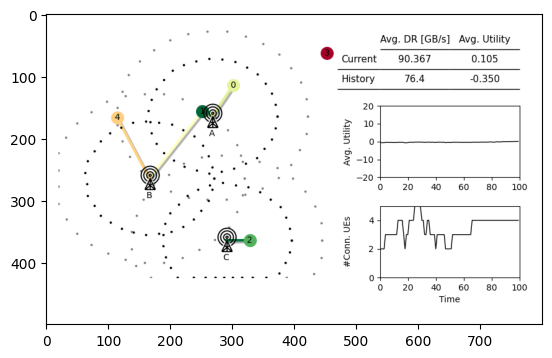

In [20]:
# Create the env for testing
# Pass rgb_array as render mode so the env can be rendered inside the notebook
env = gymnasium.make("mobile-small-ma-v0", render_mode="rgb_array")
obs, info = env.reset()
done = False

# Run one episode with the trained model
while not done:
    # Gather action from each actor (for each UE)
    action = {}
    for agent_id, agent_obs in obs.items():
        # Compute the action for the given agent using the shared policy
        action[agent_id] = ppo.compute_single_action(agent_obs, policy_id="shared_policy")

    # Apply actions and perform step on simulation environment
    obs, reward, terminated, truncated, info = env.step(action)
    done = terminated or truncated

    # Render environment as RGB
    plt.imshow(env.render())
    display.display(plt.gcf())
    display.clear_output(wait=True)